In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import sem
import scipy.stats as stats

In [2]:
# Load data and convert to a dataframe
data_analysis_to_load = "../cleaned_data/college_and_crime_cleaned_data.csv"

data_analysis = pd.read_csv(data_analysis_to_load)

Exposure to Violent Crime by Sex

In [3]:
# Create DataFrames with percentage exposed and standard error
cleaned_pct = data_analysis[['Year', 'Sex', 'per_youth_crime_exposure']]
cleaned_ser = data_analysis[['Year', 'Sex', 'SE_per_youth_crime_exposure']]

In [4]:
# Group percent exposed to violent crime by year and sex

crime_grouped = cleaned_pct.groupby(["Year", "Sex"])

# Get mean for each year/sex
crime_by_sex = crime_grouped.mean()

#Convert to pivot for easier plotting
df = pd.pivot_table(crime_by_sex, index=['Year'], columns = "Sex")
pct_df = df["per_youth_crime_exposure"]

#Reset index
pct_df = pct_df.reset_index()

#Preview DataFrame
pct_df


Sex  Year    Female      Male
0    2000  5.855556  3.877778
1    2001  4.988889  3.744444
2    2002  4.555556  2.988889
3    2003  8.208333  7.816667
4    2004  6.345455  2.627273
5    2005  8.350000  5.491667
6    2006  7.033333  6.575000
7    2007  5.333333  3.775000
8    2008  5.100000  3.600000
9    2009  6.158333  3.636364
10   2010  3.300000  3.258333
11   2011  4.658333  3.433333
12   2012  5.181818  3.354545

In [5]:
# Do the same for standard error
ser_grouped = cleaned_ser.groupby(["Year", "Sex"])

ser_by_sex = ser_grouped.mean()


df2 = pd.pivot_table(ser_by_sex, index=['Year'], columns = "Sex")
ser_df = df2["SE_per_youth_crime_exposure"]
ser_df = ser_df.reset_index()
ser_df

Sex  Year    Female      Male
0    2000  0.766667  0.600000
1    2001  0.644444  0.588889
2    2002  0.655556  0.555556
3    2003  1.666667  1.908333
4    2004  1.345455  0.636364
5    2005  1.800000  1.541667
6    2006  1.408333  1.466667
7    2007  1.000000  0.883333
8    2008  1.266667  1.263636
9    2009  1.566667  1.236364
10   2010  0.772727  1.058333
11   2011  1.108333  1.058333
12   2012  1.072727  0.936364

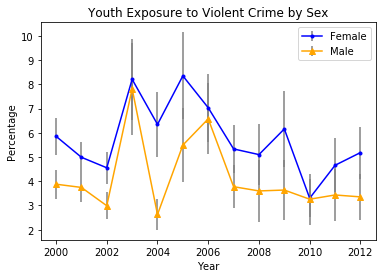

In [6]:
# Build a scatter plot for each data type
fig, ax = plt.subplots()
ax.errorbar(pct_df["Year"], pct_df["Female"], ser_df["Female"], marker=".", color = "b", ecolor='gray')
ax.errorbar(pct_df["Year"], pct_df["Male"], ser_df["Male"], marker="^", color = "orange", ecolor='gray')


# Incorporate the other graph properties
plt.title("Youth Exposure to Violent Crime by Sex")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.legend(['Female', 'Male'], loc = "upper right", fontsize = "medium")

# Save the figure
plt.savefig("../png_files/YouthExptoViolentCrime.png")

# Show plot
plt.show()

Exposure to Violent Crime by Race

In [7]:
# Create DataFrames with percentage exposed and standard error
pct_by_race = data_analysis[['Year', 'Race/ethnicity', 'per_youth_crime_exposure']]
ser_by_race = data_analysis[['Year', 'Race/ethnicity', 'SE_per_youth_crime_exposure']]

pct_by_race.head()

Year       Race/ethnicity  per_youth_crime_exposure
0  2000  White, non-Hispanic                       6.7
1  2000  White, non-Hispanic                       2.0
2  2000  White, non-Hispanic                       5.0
3  2001  White, non-Hispanic                       5.2
4  2001  White, non-Hispanic                       1.6

In [8]:
# Group percent exposed to violent crime by year and race

race_grouped = pct_by_race.groupby(["Year", "Race/ethnicity"])

# Get mean for each year/sex
crime_by_race = race_grouped.mean()

#Convert to pivot for easier plotting
df3 = pd.pivot_table(crime_by_race, index=['Year'], columns = "Race/ethnicity")
pct_df1 = df3["per_youth_crime_exposure"]
cleaned_crime_by_race = pct_df1[[ "Black, non-Hispanic", "Hispanic","White, non-Hispanic" ]]

#Reset index
cleaned_crime_by_race = pct_df1.reset_index()
cleaned_crime_by_race = cleaned_crime_by_race[["Year", "Black, non-Hispanic", "Hispanic","White, non-Hispanic" ]]

#Preview DataFrame
cleaned_crime_by_race.head()

Race/ethnicity  Year  Black, non-Hispanic  Hispanic  White, non-Hispanic
0               2000             4.816667  4.800000             4.983333
1               2001             4.166667  4.566667             4.366667
2               2002             3.816667  3.400000             4.100000
3               2003             3.700000  3.800000             4.033333
4               2004             3.666667  2.583333             3.766667

In [9]:
# Do the same for standard error
race_ser_grouped = ser_by_race.groupby(["Year", "Race/ethnicity"])

# Get mean for each year/sex
crime_by_race_ser = race_ser_grouped.mean()

#Convert to pivot for easier plotting
df4 = pd.pivot_table(crime_by_race_ser, index=['Year'], columns = "Race/ethnicity")
pct_df2 = df4["SE_per_youth_crime_exposure"]
cleaned_crime_by_race_ser = pct_df2[[ "Black, non-Hispanic", "Hispanic","White, non-Hispanic" ]]

#Reset index
cleaned_crime_by_race_ser = pct_df2.reset_index()
cleaned_crime_by_race_ser = cleaned_crime_by_race_ser[["Year", "Black, non-Hispanic", "Hispanic","White, non-Hispanic" ]]

#Preview DataFrame
cleaned_crime_by_race_ser.head()

Race/ethnicity  Year  Black, non-Hispanic  Hispanic  White, non-Hispanic
0               2000             0.766667  0.766667             0.516667
1               2001             0.683333  0.716667             0.450000
2               2002             0.700000  0.650000             0.466667
3               2003             0.700000  0.650000             0.450000
4               2004             0.683333  0.450000             0.400000

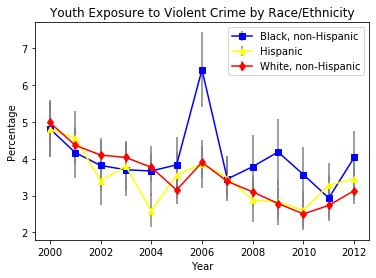

In [10]:
# Build a scatter plot for each data type
fig, ax = plt.subplots()
ax.errorbar(cleaned_crime_by_race["Year"], cleaned_crime_by_race["Black, non-Hispanic"], 
    cleaned_crime_by_race_ser["Black, non-Hispanic"], marker="s", color = "blue", ecolor='gray')
ax.errorbar(cleaned_crime_by_race["Year"], cleaned_crime_by_race["Hispanic"], 
    cleaned_crime_by_race_ser["Hispanic"], marker="^", color = "yellow", ecolor='gray')
ax.errorbar(cleaned_crime_by_race["Year"], cleaned_crime_by_race["White, non-Hispanic"], 
    cleaned_crime_by_race_ser["White, non-Hispanic"], marker="d", color = "red", ecolor='gray')



# Incorporate the other graph properties
plt.title("Youth Exposure to Violent Crime by Race/Ethnicity")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.legend(['Black, non-Hispanic', 'Hispanic', 'White, non-Hispanic'], loc = "upper right", fontsize = "medium")

# Save the figure
plt.savefig("../png_files/YouthExptoViolentCrimebyRace.png")

# Show plot
plt.show()

## Enrolled in College by Race

In [11]:
# College enrollment is repeated because of three types of crime
# Retained one for this analysis
remove_triples = data_analysis.loc[data_analysis["Type of violent crime"] == "Violent crime"]

In [12]:
# Group by race and by year
# Calculate the means based on race and year
by_race = remove_triples.groupby(["Race/ethnicity", "Year"]).mean()

In [13]:
# Transpose the table so that each race is a column
by_year_by_race = pd.pivot_table(by_race, index=['Year'], columns = "Race/ethnicity")

# Create a dataframe with only the mean percent college enrollment
rate_by_year_by_race = by_year_by_race["per_college_enroll"]

# Reset the index
rate_by_year_by_race = rate_by_year_by_race.reset_index()

# Print head (check data)
rate_by_year_by_race.head()

Race/ethnicity  Year  Black, non-Hispanic  Hispanic  \
0               2000                30.15     21.95   
1               2001                31.10     21.75   
2               2002                31.60     20.30   
3               2003                32.10     23.85   
4               2004                31.55     24.95   

Race/ethnicity  Two or more races, non-Hispanic  White, non-Hispanic  
0                                           NaN                38.75  
1                                           NaN                39.55  
2                                           NaN                40.85  
3                                         41.50                41.50  
4                                         36.65                41.70

In [14]:
# Create a dataframe with only the mean standard errors of percent college enrollment
se_rate_by_year_by_race = by_year_by_race["SE_college_enroll"]

# Reset the index
se_rate_by_year_by_race = se_rate_by_year_by_race.reset_index()

# Print head (check data)
se_rate_by_year_by_race.head()

Race/ethnicity  Year  Black, non-Hispanic  Hispanic  \
0               2000                1.695     1.585   
1               2001                1.705     1.545   
2               2002                1.655     1.340   
3               2003                1.685     1.435   
4               2004                1.650     1.445   

Race/ethnicity  Two or more races, non-Hispanic  White, non-Hispanic  
0                                           NaN                0.800  
1                                           NaN                0.805  
2                                           NaN                0.775  
3                                          5.06                0.775  
4                                          4.86                0.770

In [15]:
# List of the years for the x-axis
x_axis_by_year = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

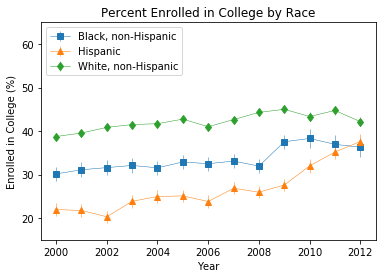

In [16]:
# Create the plot area
fig, ax = plt.subplots()

# Plot the mean and standard error for college enrollment based on race
ax.errorbar(x_axis_by_year, rate_by_year_by_race["Black, non-Hispanic"], 
            se_rate_by_year_by_race["Black, non-Hispanic"], linewidth = 0.5, marker = "s", 
            label = "Black, non-Hispanic")
ax.errorbar(x_axis_by_year, rate_by_year_by_race["Hispanic"], 
            se_rate_by_year_by_race["Hispanic"], linewidth = 0.5, marker = "^", 
            label = "Hispanic")
ax.errorbar(x_axis_by_year, rate_by_year_by_race["White, non-Hispanic"], 
            se_rate_by_year_by_race["White, non-Hispanic"], linewidth = 0.5, marker = "d", 
            label = "White, non-Hispanic")

# Set the x-axis range
ax.set_ylim(15, 65)

# Label the x- and y-axes
ax.set_xlabel("Year")
ax.set_ylabel("Enrolled in College (%)")

# Label the graph
ax.set_title("Percent Enrolled in College by Race")

# Place the legend in the best place on the plot and make the font readable
plt.legend(loc = "upper left", fontsize = "medium")

# Save the graph
plt.savefig("../png_files/college_enroll_by_race.png")

## Enrolled in College by Sex

In [17]:
college_enrollment_to_load = "../raw_data/userssharedsdfperc18to24yoenrld24ycsre20002012.csv"
college_enrollment = pd.read_csv(college_enrollment_to_load)

In [18]:
college_enrollment_cleaned = college_enrollment.dropna(subset = ["Sex", "Race/ethnicity"])
college_enrollment_reduced = college_enrollment_cleaned[["Race/ethnicity", "Sex", "Year", "Percentage", 
                                                         "Standard Error on Percentage", "Count (in thousands)", 
                                                         "Standard Error on Count (in thousands)"]]

college_enrollment_reduced["Percentage"]=college_enrollment_reduced.Percentage.str.replace('%', " ").astype(float)
college_enrollment_reduced

//anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Race/ethnicity     Sex  Year  Percentage  \
130              White, non-Hispanic    Male  2000        36.2   
131              White, non-Hispanic    Male  2001        37.2   
132              White, non-Hispanic    Male  2002        38.9   
133              White, non-Hispanic    Male  2003        38.5   
134              White, non-Hispanic    Male  2004        38.4   
..                               ...     ...   ...         ...   
307  Two or more races, non-Hispanic  Female  2008        48.7   
308  Two or more races, non-Hispanic  Female  2009        41.0   
309  Two or more races, non-Hispanic  Female  2010        35.8   
310  Two or more races, non-Hispanic  Female  2011        46.0   
311  Two or more races, non-Hispanic  Female  2012        43.6   

     Standard Error on Percentage  Count (in thousands)  \
130                          0.79                3136.0   
131                          0.79                3291.0   
132                          0.77                3287.0   
133                          0.77                3291.0   
134                          0.76                3322.0   
..                            ...                   ...   
307                          5.17                 110.0   
308                          4.65                 111.0   
309                          5.23                  92.0   
310                          5.07                 123.0   
311                          5.13                 152.0   

     Standard Error on Count (in thousands)  
130                                    85.0  
131                                    87.0  
132                                    83.0  
133                                    83.0  
134                                    83.0  
..                                      ...  
307                                    16.0  
308                                    16.0  
309                                    15.0  
310                                    16.0  
311                                    23.0  

[182 rows x 7 columns]

In [19]:
# Create DataFrame with percentage enrollment 
cleaned_pct = college_enrollment_reduced[['Year', 'Sex', 'Percentage']]

# # # Group percent enrolled by year and sex
pct_grouped = cleaned_pct.groupby(["Year", "Sex"])
pct_sex=pct_grouped.mean()

df = pd.pivot_table(pct_sex, index=['Year'], columns = "Sex")
df1=df["Percentage"]
df1 = df1.reset_index()

In [20]:
# Create DataFrame with standard error
cleaned_ser = college_enrollment_reduced[['Year', 'Sex', 'Standard Error on Percentage']]

# #standard error
ser_grouped = cleaned_ser.groupby(["Year", "Sex"])
ser_by_sex = ser_grouped.mean()

df2 = pd.pivot_table(ser_by_sex, index=['Year'], columns = "Sex")
ser_df = df2["Standard Error on Percentage"]
ser_df = ser_df.reset_index()

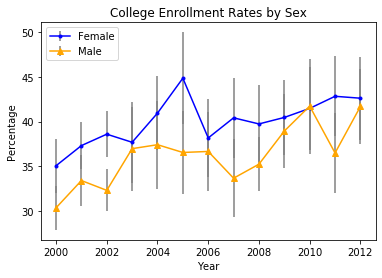

In [21]:
# Build a scatter plot for each data type
fig, ax = plt.subplots()
ax.errorbar(df1["Year"], df1['Female'], ser_df['Female'], marker=".", color = "b", ecolor='gray')
ax.errorbar(df1["Year"], df1["Male"], ser_df["Male"], marker="^", color = "orange", ecolor='gray')


# Incorporate the other graph properties
plt.title("College Enrollment Rates by Sex")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.legend(['Female','Male'], loc = "upper left", fontsize = "medium")

# Save the figure
plt.savefig("../png_files/CollegeBySex.png")

# Show plot
plt.show()

## Incarceration Rates by Year

In [23]:
cleaned_file = "../cleaned_data/Cleaned_Imprisonment_Rates.csv"
cleaned_read = pd.read_csv(cleaned_file)

imprisonment_df = cleaned_read
imprisonment_df.head(12)

Unnamed: 0 Characteristic Sex  Year  Rate per 100,000   Count
0            0          Total  MF  2000               791  218896
1            1          Total  MF  2001               777  219439
2            2          Total  MF  2002               766  220072
3            3          Total  MF  2003               750  218436
4            4          Total  MF  2004               707  207416
5            5          Total  MF  2005               680  200050
6            6          Total  MF  2006               663  196234
7            7          Total  MF  2007               662  197731
8            8          Total  MF  2008               658  199105
9            9          Total  MF  2009               660  201325
10          10          Total  MF  2010               644  198997
11          11          Total  MF  2011               616  192248

In [24]:
# Group by Year and Sex and get means
mean_sex_df = imprisonment_df.groupby(['Year', "Sex"]).mean()
mean_sex_df.head()

Unnamed: 0  Rate per 100,000    Count
Year Sex                                          
2000 Female       135.2              91.0   3710.4
     MF            46.8            1139.6  89390.2
     Male          91.0            2159.4  85623.8
2001 Female       136.2              94.8   3939.2
     MF            47.8            1109.2  89539.2

In [25]:
# Translate the table so columns are easier to work with.
df = pd.pivot_table(mean_sex_df, index=['Year'], columns = "Sex")
mean_sex_df = df["Rate per 100,000"]
mean_sex_df = mean_sex_df.reset_index()
mean_sex_df.head()

Sex  Year  Female      MF    Male
0    2000    91.0  1139.6  2159.4
1    2001    94.8  1109.2  2088.0
2    2002    97.6  1080.4  2021.4
3    2003    94.0  1027.6  1917.6
4    2004    95.4   987.6  1835.4

In [26]:
# Group by Year and Sex and get sem
sem_sex_df = imprisonment_df.groupby(['Year', "Sex"]).sem()
sem_sex_df.head()

Characteristic         Count  Rate per 100,000  Unnamed: 0
Year Sex                                                               
2000 Female             NaN   1441.578323         23.801260   28.063143
     MF                 NaN  35401.550455        412.636717   13.384319
     Male               NaN  33958.624588        822.356407   20.554805
2001 Female             NaN   1540.096471         23.618637   28.063143
     MF                 NaN  35224.845097        382.723190   13.384319

In [27]:
# Translate the table so columns are easier to work with.
df = pd.pivot_table(sem_sex_df, index=['Year'], columns = "Sex")
sem_sex_df = df["Rate per 100,000"]
sem_sex_df = sem_sex_df.reset_index()
sem_sex_df.head()

Sex  Year     Female          MF        Male
0    2000  23.801260  412.636717  822.356407
1    2001  23.618637  382.723190  755.289680
2    2002  22.028618  361.516196  708.078852
3    2003  20.423026  322.057541  626.439670
4    2004  19.252532  305.166938  589.682847

In [28]:
clr={} #[] = marker, markercolor, markersize, linecolor linewidth
clr['Male'] =   ['.', 'orange', 5, 'orange', 1]
clr['Female'] = ['^', 'blue', 5, 'blue', 1]
clr['MF'] = ['s', 'green', 5, 'green', 1]
clr['Black'] = ['s', 'blue', 5, 'blue', 1]
clr['White'] = ['d', 'red', 5, 'red', 1]
clr['Hispanic'] = ['^', 'yellow', 5, 'yellow', 1]
clr['Other'] = ['.', 'green', 5, 'green', 1]

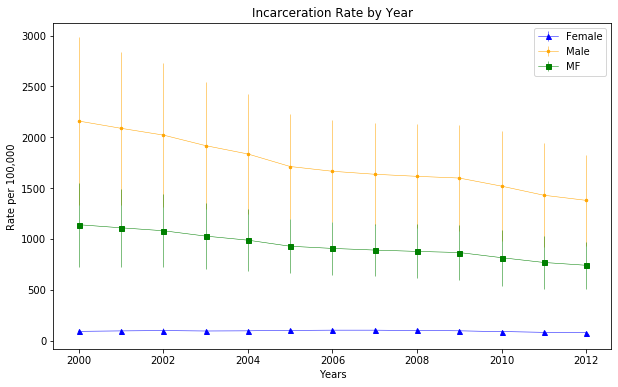

In [29]:
fig, ax = plt.subplots(figsize=(10,6))

x_axis = mean_sex_df["Year"].tolist()

female_mean = mean_sex_df["Female"].tolist()
male_mean = mean_sex_df["Male"].tolist()
mf_mean = mean_sex_df["MF"].tolist()

female_err = sem_sex_df["Female"].tolist()
male_err = sem_sex_df["Male"].tolist()
mf_err = sem_sex_df["MF"].tolist()

ax.errorbar(x_axis, female_mean, female_err, label='Female', marker=clr['Female'][0], markerfacecolor=clr['Female'][1], markersize=5, color=clr['Female'][1], linewidth=0.5)
ax.errorbar(x_axis, male_mean, male_err, marker=clr['Male'][0], label='Male',markerfacecolor=clr['Male'][1], markersize=5, color=clr['Male'][1], linewidth=0.5)
ax.errorbar(x_axis, mf_mean, mf_err, marker=clr['MF'][0], label='MF',markerfacecolor=clr['MF'][1], markersize=5, color=clr['MF'][1], linewidth=0.5)

plt.title("Incarceration Rate by Year")
plt.xlabel("Years")
plt.ylabel("Rate per 100,000")
#plt.grid()
plt.legend()
plt.savefig('../png_files/IncarcerationRateByYear_gridless.png')
plt.show()

## Incarceration Rates by Race

In [31]:
byRace_df = imprisonment_df.groupby(['Year', "Characteristic"]).mean()
byRace_df.head()

Unnamed: 0  Rate per 100,000     Count
Year Characteristic                                                     
2000 Black, non-Hispanic               130.0            2769.0   52510.5
     Hispanic                          143.0             919.0   24272.5
     Other race, non-Hispanic          156.0             825.5    7686.5
     Total                               0.0             791.0  218896.0
     Total - Black, non-Hispanic        52.0            2732.0  104880.0

In [32]:
df = pd.pivot_table(byRace_df, index=['Year'], columns = "Characteristic")
race_df = df["Rate per 100,000"]
mean_race_df = race_df.reset_index()
mean_race_df.head()

Characteristic  Year  Black, non-Hispanic  Hispanic  Other race, non-Hispanic  \
0               2000               2769.0     919.0                     825.5   
1               2001               2595.5     928.0                     831.0   
2               2002               2464.0     935.5                     802.5   
3               2003               2236.5     930.5                     797.0   
4               2004               2119.0     906.0                     788.0   

Characteristic  Total  Total - Black, non-Hispanic  Total - Female  \
0               791.0                       2732.0            67.0   
1               777.0                       2577.0            71.0   
2               766.0                       2461.0            74.0   
3               750.0                       2241.0            73.0   
4               707.0                       2134.0            73.0   

Characteristic  Total - Hispanic  Total - Male  \
0                         1004.0        1478.0   
1                         1012.0        1447.0   
2                         1017.0        1422.0   
3                         1007.0        1388.0   
4                          974.0        1305.0   

Characteristic  Total - Other race, non-Hispanic  Total - White, non-Hispanic  \
0                                          826.0                        345.0   
1                                          831.0                        349.0   
2                                          805.0                        353.0   
3                                          800.0                        340.0   
4                                          792.0                        331.0   

Characteristic  White, non-Hispanic  
0                             340.0  
1                             343.5  
2                             347.5  
3                             334.5  
4                             325.0

In [33]:
err_byRace_df = imprisonment_df.groupby(['Year', "Characteristic"]).sem()
err_byRace_df.head()

Count  Rate per 100,000  Sex  Unnamed: 0
Year Characteristic                                                         
2000 Black, non-Hispanic          49010.5            2589.0  NaN        26.0
     Hispanic                     22676.5             846.0  NaN        26.0
     Other race, non-Hispanic      6817.5             731.5  NaN        26.0
     Total                            NaN               NaN  NaN         NaN
     Total - Black, non-Hispanic      NaN               NaN  NaN         NaN

In [34]:
df = pd.pivot_table(err_byRace_df, index=['Year'], columns = "Characteristic")
err_df = df["Rate per 100,000"]
race_err_df = err_df.reset_index()
race_err_df.head()

Characteristic  Year  Black, non-Hispanic  Hispanic  Other race, non-Hispanic  \
0               2000               2589.0     846.0                     731.5   
1               2001               2414.5     853.0                     727.0   
2               2002               2287.0     854.5                     694.5   
3               2003               2066.5     846.5                     703.0   
4               2004               1953.0     817.0                     691.0   

Characteristic  White, non-Hispanic  
0                             299.0  
1                             300.5  
2                             299.5  
3                             285.5  
4                             273.0

In [35]:
mean_race_df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012])

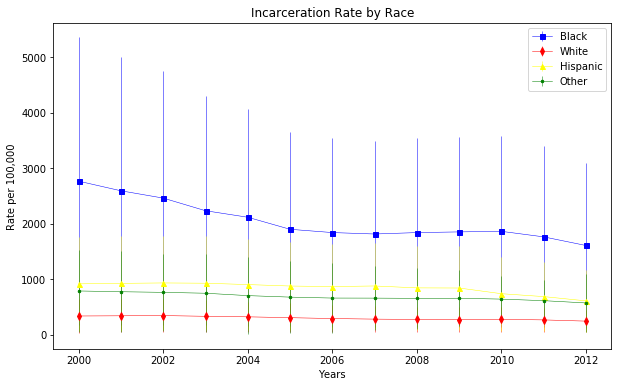

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
x_axis = mean_race_df["Year"].tolist()
black_mean = mean_race_df["Black, non-Hispanic"].tolist()
white_mean = mean_race_df["White, non-Hispanic"].tolist()
hispanic_mean = mean_race_df["Hispanic"].tolist()
other_mean = mean_race_df["Total"].tolist()

black_err = race_err_df["Black, non-Hispanic"].tolist()
white_err = race_err_df["White, non-Hispanic"].tolist()
hispanic_err = race_err_df["Hispanic"].tolist()
other_err = race_err_df["Other race, non-Hispanic"].tolist()

ax.errorbar(x_axis, black_mean, black_err, label='Black', marker=clr['Black'][0], color=clr['Black'][1], markerfacecolor=clr['Black'][1], markersize=5, linewidth=0.5)
ax.errorbar(x_axis, white_mean, white_err, label='White', marker=clr['White'][0], color=clr['White'][1],markerfacecolor=clr['White'][1], markersize=5, linewidth=0.5)
ax.errorbar(x_axis, hispanic_mean, hispanic_err, label='Hispanic', marker=clr['Hispanic'][0], color=clr['Hispanic'][1], markerfacecolor=clr['Hispanic'][1], markersize=5, linewidth=0.5)
ax.errorbar(x_axis, other_mean, other_err, label='Other', marker=clr['Other'][0], color=clr['Other'][1], markerfacecolor=clr['Other'][1], markersize=5, linewidth=0.5)

plt.title("Incarceration Rate by Race")
plt.xlabel("Years")
plt.ylabel("Rate per 100,000")
#plt.grid()
plt.legend()
plt.savefig('../png_files/IncarcerationRateByRace_gridless.png')
plt.show()

## Youth Exposure to Crime ~ Statistical Analysis

In [ ]:
by_race_for_anova = data_analysis[["Race/ethnicity", "per_youth_crime_exposure"]]
by_race_for_anova = by_race_for_anova.rename(columns={"Race/ethnicity": "race_ethnicity"})

In [ ]:
by_race_for_anova = by_race_for_anova.set_index("race_ethnicity")

In [ ]:
by_race_for_anova_cleaned = by_race_for_anova.loc[["White, non-Hispanic", "Hispanic", 
                                                   "Black, non-Hispanic"], :]
by_race_for_anova_cleaned = by_race_for_anova_cleaned.reset_index()

In [ ]:
by_race_for_anova_cleaned.boxplot("per_youth_crime_exposure", by="race_ethnicity", 
                                  figsize=(20, 10))

In [ ]:
group1_race = by_race_for_anova_cleaned[by_race_for_anova_cleaned["race_ethnicity"] == 
                                        "Black, non-Hispanic"]["per_youth_crime_exposure"]
group2_race = by_race_for_anova_cleaned[by_race_for_anova_cleaned["race_ethnicity"] == 
                                        "Hispanic"]["per_youth_crime_exposure"]
group3_race = by_race_for_anova_cleaned[by_race_for_anova_cleaned["race_ethnicity"] == 
                                        "White, non-Hispanic"]["per_youth_crime_exposure"]

In [ ]:
stats.f_oneway(group1_race, group2_race, group3_race)

In [ ]:
by_sex_for_anova = data_analysis[["Sex", "per_youth_crime_exposure"]]
by_sex_for_anova

In [ ]:
by_sex_for_anova.boxplot("per_youth_crime_exposure", by="Sex", figsize=(20, 10))

In [ ]:
group1_sex = by_sex_for_anova[by_sex_for_anova["Sex"] == "Female"]["per_youth_crime_exposure"]
group2_sex = by_sex_for_anova[by_sex_for_anova["Sex"] == "Male"]["per_youth_crime_exposure"]

In [ ]:
stats.ttest_ind(group1_sex.dropna(), group2_sex.dropna(), equal_var=False)